In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('tir.txt',header=None,names=['x','y','v','can','angle'],na_values='None')
dt.head()

,x,y,v,can,angle
0,22,2,14,False,NaN
1,17,-2,11,False,NaN
2,35,-2,13,False,NaN
3,17,1,16,True,24.261790
4,18,5,18,True,33.984204


In [3]:
dtcl = dt.drop(columns=['angle'])
dtcl.shape

(200, 4)

In [4]:
dtcl.head()

,x,y,v,can
0,22,2,14,False
1,17,-2,11,False
2,35,-2,13,False
3,17,1,16,True
4,18,5,18,True


In [5]:
dtrg = dt[dt['angle'].notna()].drop(columns=['can'])
dtrg.shape

(119, 4)

In [6]:
dtrg.head()

,x,y,v,angle
3,17,1,16,24.261790
4,18,5,18,33.984204
5,20,-1,15,26.160026
8,14,0,18,12.540177
10,6,0,17,5.875763


## Classificació

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xp = pd.DataFrame(pca.fit_transform(dtcl.iloc[:,:-1]))
Xp.head()

,0,1
0,0.664854,0.848211
1,-4.349982,5.015791
2,13.623704,2.996547
3,-4.370738,-0.685613
4,-3.343500,-3.878788


In [8]:
Y = pd.Series(dtcl.iloc[:,-1],name='angle')
Y.index = range(len(Xp))
Y.head()

0    False
1    False
2    False
3     True
4     True
Name: angle, dtype: bool

In [9]:
Xp.loc[:,'class'] = Y
Xp.head()

,0,1,class
0,0.664854,0.848211,False
1,-4.349982,5.015791,False
2,13.623704,2.996547,False
3,-4.370738,-0.685613,True
4,-3.343500,-3.878788,True


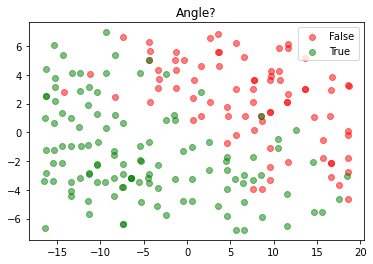

In [10]:
names = [False,True]
plt.figure()
for n, c in zip(names, 'rg'):
    x0 = Xp[Xp['class']==n].loc[:,0]
    x1 = Xp[Xp['class']==n].loc[:,1]
    plt.scatter(x0, x1, c=c, label=n, alpha=0.5)
plt.legend()
plt.title('Angle?')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

def clasificación(clf, msg, ths):
    print(msg)
    clf.fit(dtcl.iloc[:ths,:-1],dtcl.iloc[:ths,-1])
    preds = pd.Series(clf.predict(dtcl.iloc[ths:,:-1]), name='preds')
    reals = pd.Series(dtcl.iloc[ths:,-1],name='reals')
    reals.index = range(dtcl.shape[0]-ths)
    print('acc:', accuracy_score(reals, preds))
    print(pd.crosstab(reals,preds))

In [12]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
clasificación(modelGNB, 'GNB', 150)

GNB
acc: 0.96
preds  False  True 
reals              
False     19      2
True       0     29


In [13]:
# number of training samples observed in each class.
modelGNB.class_count_

array([60., 90.])

In [14]:
# probability of each class.
modelGNB.class_prior_

array([0.4, 0.6])

In [15]:
# class labels known to the classifier
modelGNB.classes_

array([False,  True])

In [16]:
# absolute additive value to variances
modelGNB.epsilon_

1.1262262222222222e-07

In [17]:
# variance of each feature per class
modelGNB.sigma_

array([[65.14972233, 10.96555567,  7.03222233],
       [92.23654332, 11.128889  ,  9.86283962]])

In [18]:
# mean of each feature per class
modelGNB.theta_

array([[28.31666667,  0.03333333, 12.96666667],
       [16.91111111, -0.4       , 17.32222222]])

In [30]:
d = {}
d['class_count'] = modelGNB.class_count_.tolist()
d['class_prior'] = modelGNB.class_prior_.tolist()
d['classes'] = modelGNB.classes_.tolist()
d['epsilon'] = modelGNB.epsilon_.tolist()
d['sigma'] = modelGNB.sigma_.tolist()
d['theta'] = modelGNB.theta_.tolist()
d

{'class_count': [60.0, 90.0],
 'class_prior': [0.4, 0.6],
 'classes': [False, True],
 'epsilon': 1.1262262222222222e-07,
 'sigma': [[65.14972233484482, 10.965555668178181, 7.032222334844851],
  [92.23654332249917, 11.128889001511508, 9.862839618795457]],
 'theta': [[28.316666666666666, 0.03333333333333333, 12.966666666666667],
  [16.91111111111111, -0.4, 17.322222222222223]]}

In [31]:
import json 
with open('tir.json', 'w') as f:
    json.dump(d, f, indent = 4) 

In [32]:
dtcl.tail()

,x,y,v,can
195,15,-3,20,True
196,7,-5,16,True
197,14,2,18,True
198,40,1,17,False
199,20,4,11,False


In [35]:
modelGNB.predict([[14,2,18]])[0]

True

In [39]:
modelGNB.predict_proba([[14,2,18]])[0].tolist()

[0.03634047439453955, 0.9636595256054606]

In [36]:
modelGNB.predict([[20,4,11]])[0]

False

In [40]:
modelGNB.predict_proba([[20,4,11]])[0].tolist()

[0.7972931807060677, 0.2027068192939325]

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
clasificación(dtc, 'DT', 150)

DT
acc: 0.94
preds  False  True 
reals              
False     20      1
True       2     27


In [20]:
dtc.tree_.node_count

41

In [21]:
dtc.tree_.max_depth

6

import sklearn

help(sklearn.tree._tree.Tree)

[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

[Text(474.6875, 841.2857142857143, 'X[2] <= 16.5\ngini = 0.48\nsamples = 150\nvalue = [60, 90]'),
 Text(251.875, 711.8571428571429, 'X[0] <= 16.5\ngini = 0.457\nsamples = 82\nvalue = [53, 29]'),
 Text(77.5, 582.4285714285714, 'X[1] <= 2.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(38.75, 453.00000000000006, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(116.25, 453.00000000000006, 'X[0] <= 6.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(77.5, 323.57142857142867, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(155.0, 323.57142857142867, 'X[2] <= 13.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(116.25, 194.14285714285722, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(193.75, 194.14285714285722, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(426.25, 582.4285714285714, 'X[0] <= 20.5\ngini = 0.215\nsamples = 57\nvalue = [50, 7]'),
 Text(348.75, 453.00000000000006, 'X[2] <= 12.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(310.0, 323.5714285714

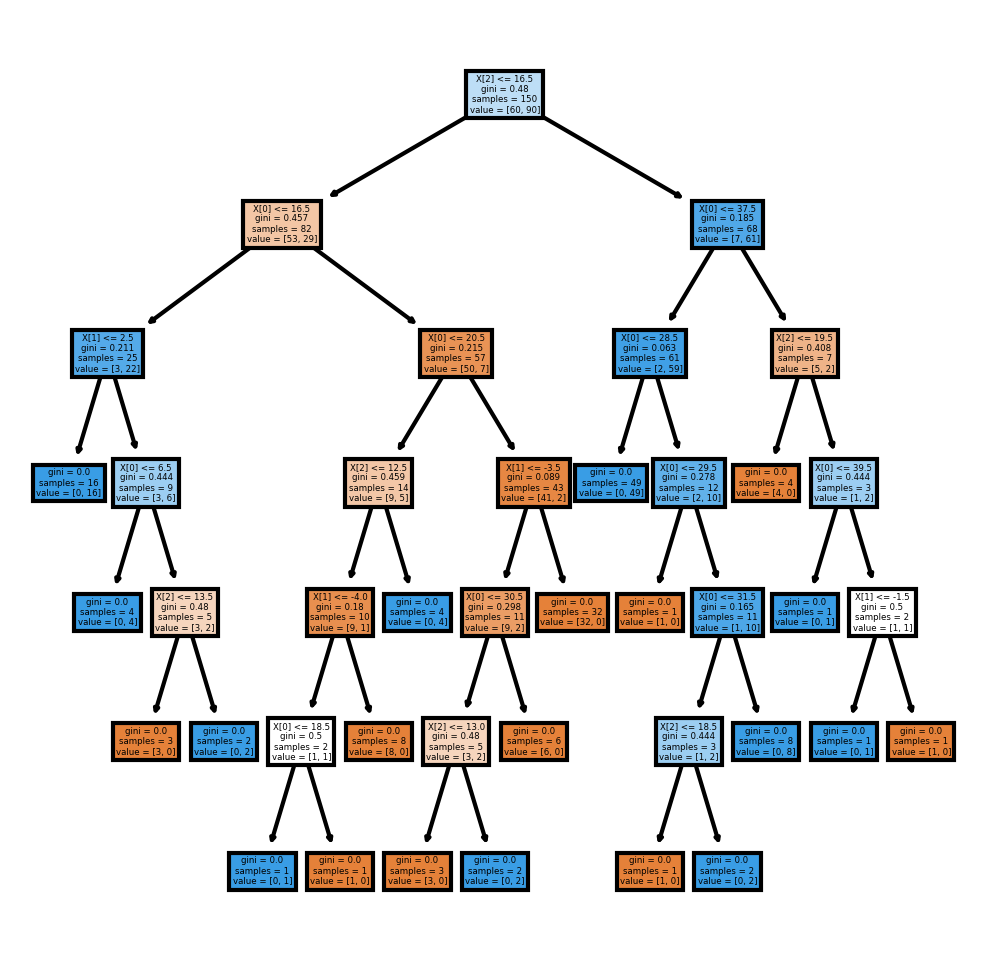

In [22]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc, filled = True)

In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,10,5),max_iter=2000)
clasificación(model, 'MLP', 150)

MLP
acc: 0.98
preds  False  True 
reals              
False     20      1
True       0     29


In [24]:
model.n_iter_

687

In [25]:
model.loss_

0.028977725173724368

model.intercepts_

model.coefs_

## Regressió

In [26]:
from sklearn.metrics import r2_score
 
def regression(nom, rgs, ths):
    print(nom)
    rgs.fit(dtrg.iloc[:ths,:-1],dtrg.iloc[:ths,-1])

    preds = pd.Series(rgs.predict(dtrg.iloc[ths:,:-1]),name='preds')
    reals = pd.Series(dtrg.iloc[ths:,-1],name='reals')
    reals.index = range(dtrg.shape[0] - ths)
    
    print('r2:', round(r2_score(reals, preds), 3))

In [27]:
from sklearn.tree import DecisionTreeRegressor
regression('DTs:', DecisionTreeRegressor(), 90)

DTs:
r2: 0.928


In [28]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,10,5),max_iter=4000)
regression('MLP:', model, 90)
model.n_iter_

MLP:
r2: 0.99


2051